## Data from FE statistics

Sites used:
https://www.kaggle.com/datasets/brunopham/formula-e-championship/data

The rest of the results from the 2023-204 season were taken from:
https://results.fiaformulae.com/
 

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import sqlite3
import glob
import os

In [4]:

drivers = pd.read_csv("drivers.csv", encoding='ISO-8859-1') # very annoying error while imporing had to be fixed for drivers and eprix
eprix = pd.read_csv("eprix.csv", encoding='ISO-8859-1')
powertrains = pd.read_csv("powertrains.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
seasons = pd.read_csv("seasons.csv")
teams = pd.read_csv("teams.csv")

In [39]:
#Importing more race results taht did not exist. csv or pdf 

csv_files = glob.glob(os.path.join('more_results/', '*.CSV'))

more_results_list = [pd.read_csv(file, delimiter=';') for file in csv_files]

all_more_results = pd.concat(more_results_list, ignore_index=True)

all_more_results

,POSITION,NUMBER,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,FL_LAPNUM,FL_TIME,FL_KPH,...,DRIVER_LICENSE,DRIVER_HOMETOWN,DRIVER_COUNTRY,DRIVER_SHORTNAME,DRIVER_ECM Driver Id,DRIVER_ECM Country Id,DRIVER_*Extra 3,DRIVER_*Extra 4,DRIVER_*Extra 5,Unnamed: 37
0,1.0,8,Classified,34,53:03.071,-,-,32,1:15.873,139.2,...,NaN,GBR,GBR,BIR,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,9,Classified,34,53:03.635,+0.564,+0.564,28,1:15.805,139.3,...,NaN,NZL,NZL,EVA,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,22,Classified,34,53:06.611,+3.540,+2.976,28,1:15.979,139.0,...,NaN,GBR,GBR,ROW,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,94,Classified,34,53:06.700,+3.629,+0.089,25,1:15.877,139.2,...,NaN,DEU,DEU,WEH,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,Classified,34,53:06.793,+3.722,+0.093,25,1:15.890,139.1,...,NaN,GBR,GBR,DEN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,7,Not classified,28,41:54.893,NaN,NaN,14,1:12.139,103.8,...,NaN,DEU,DEU,GUE,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,18,Not classified,8,15:02.998,NaN,NaN,6,1:16.338,98.1,...,NaN,IND,IND,DAR,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,8,Not classified,6,11:01.280,NaN,NaN,6,1:16.704,97.6,...,NaN,GBR,GBR,BIR,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,48,Not classified,1,1:27.487,NaN,NaN,0,NaN,NaN,...,NaN,CHE,CHE,MOR,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Convert back to a clean csv so it can be easily modified.
all_more_results.to_csv("all_more_results_list.csv", index=False)


In [41]:
more_results = pd.read_csv("all_more_results_list.csv")


In [8]:
# Quickly explore the different files we have

print(drivers.isnull().sum())
print(eprix.isnull().sum())
print(powertrains.isnull().sum())
print(races.isnull().sum())
print(results.isnull().sum())
print(seasons.isnull().sum())
print(teams.isnull().sum())

# Look like there are some empty items in "results" but that is to be expected with DQs and other reasons.

driverId       0
firstname      0
lastname       0
nationality    0
dtype: int64
eprixId          0
eprixRef         0
circuit          0
location         0
country          0
racesPerTrack    0
dtype: int64
powertrainsId    0
powertrain       0
team             0
season           0
dtype: int64
Round       0
ePrix       0
Country     0
Track       0
Date        0
raceId      0
seasonId    0
dtype: int64
resultsId      0
seasonId       0
raceId         0
pos            0
number         0
teamId         0
driverId       0
laps          48
time          47
gap          586
interval     578
kp/h          70
best          67
lap          115
dtype: int64
season       0
yearstart    0
yearend      0
url          1
dtype: int64
teamId         0
teamRef        0
name           0
nationality    0
dtype: int64


In [9]:
drivers

,driverId,firstname,lastname,nationality
0,1,daniel,abt,germany
1,2,jaime,alguersuari,spain
2,3,marco,andretti,united states
3,4,oliver,askew,united states
4,5,david,beckmann,germany
...,...,...,...,...
81,82,jehan,daruvala,india
82,83,Paul,ARON,estonia
83,84,Taylor,BARNARD,united kingdom
84,85,Caio,COLLET,brazil


In [10]:
eprix # added 4 more drives manually to account for last 12 races of 2024

,eprixId,eprixRef,circuit,location,country,racesPerTrack
0,1,battersea,battersea park street circuit,london eprix,united kingdom,4
1,2,beijing,beijing olympic green circuit,beijing eprix,china,2
2,3,berlin,berlin street circuit,berlin eprix,germany,1
3,4,bern,bern street circuit,swiss eprix,switzerland,1
4,5,biscayne bay,biscayne bay street circuit,miami eprix,united states,1
5,6,brooklyn,brooklyn street circuit,new york city eprix,united states,10
6,7,capte_town,cape town street circuit,cape town eprix,south africa,1
7,8,eur,circuito cittadino dell'eur,rome eprix,italy,8
8,9,haiting,haitang bay circuit,sanya eprix,china,1
9,10,hermanos,autodromo hermanos rodríguez,mexico city eprix,mexico,7


In [11]:
powertrains

,powertrainsId,powertrain,team,season
0,1,nextev tcr formulae 001,nextev tcr formula e team,2
1,2,virgin dsv-01,ds virgin racing formula e team,2
2,3,venturi vm200-fe-01,multiple,2
3,4,renault z.e 15,renault e.dams,2
4,5,motomatica jt-01,trulli formula e team,2
...,...,...,...,...
57,58,nissan e-4orce 04,neom mclaren formula e team,9
58,59,maserati tipo folgore,maserati msg racing,9
59,60,jaguar i-type 6,multiple,9
60,61,porsche 99x electric,multiple,9


In [12]:
races

,Round,ePrix,Country,Track,Date,raceId,seasonId
0,1,Beijing ePrix,China,Beijing Olympic Green Circuit,41895,1900-01-01,1
1,2,Putrajaya ePrix,Malaysia,Putrajaya Street Circuit,41965,1900-01-02,1
2,3,Punta del Este ePrix,Uruguay,Punta del Este Street Circuit,41986,1900-01-03,1
3,4,Buenos Aires ePrix,Argentina,Puerto Madero Street Circuit,42014,1900-01-04,1
4,5,Miami ePrix,United States,Biscayne Bay Street Circuit,42077,1900-01-05,1
...,...,...,...,...,...,...,...
127,12,Shanghai E-Prix,China,Shanghai International Circuit,45438,1900-05-08,10
128,13,Portland E-Prix,United States,Portland International Raceway,45472,1900-05-09,10
129,14,Portland E-Prix,United States,Portland International Raceway,45473,1900-05-10,10
130,15,London E-Prix,United Kingdom,ExCeL London,45493,1900-05-11,10


In [21]:
results # this needs a bit of work - ends in round 3 of the 10th season.

,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,interval,kp/h,best,lap
0,1,1,1,DNF,55,3,64,21.0,50:52.3,NaN,NaN,85.525,01:45.1,21.0
1,2,1,1,DNF,9,44,10,14.0,37:24.7,NaN,NaN,77.53,01:45.9,13.0
2,3,1,1,DNF,10,46,74,2.0,41:22.8,NaN,NaN,10.013,01:52.6,2.0
3,4,1,1,DNF,21,26,65,NaN,01:41.3,NaN,NaN,NaN,01:49.5,NaN
4,5,1,1,1,11,6,33,25.0,52:23.4,NaN,NaN,98.863,01:46.7,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2552,10,119,18,3,19,66,36.0,44:18.4,26.564,0.925,122.436,01:11.5,24.0
2552,2553,10,119,DNF,33,19,71,32.0,41:33.9,NaN,NaN,116.106,01:10.8,28.0
2553,2554,10,119,DNF,18,27,18,25.0,30:55.5,NaN,NaN,122.172,01:11.1,17.0
2554,2555,10,119,DNF,8,31,7,22.0,27:34.3,NaN,NaN,120.739,01:10.7,20.0


In [43]:
more_results # the rest of the results for the final 12 races in the 2023-2024 season semi formatted.

,resultsId,seasonId,raceId,POSITION,NUMBER,STATUS,LAPS,TOTAL_TIME,GAP_FIRST,GAP_PREVIOUS,...,DRIVER_LICENSE,DRIVER_HOMETOWN,DRIVER_COUNTRY,DRIVER_SHORTNAME,DRIVER_ECM Driver Id,DRIVER_ECM Country Id,DRIVER_*Extra 3,DRIVER_*Extra 4,DRIVER_*Extra 5,Unnamed: 37
0,2557,10,120,1.0,8,Classified,34,53:03.1,-,-,...,NaN,GBR,GBR,BIR,NaN,NaN,NaN,NaN,NaN,NaN
1,2558,10,120,2.0,9,Classified,34,53:03.6,0.564,0.564,...,NaN,NZL,NZL,EVA,NaN,NaN,NaN,NaN,NaN,NaN
2,2559,10,120,3.0,22,Classified,34,53:06.6,3.54,2.976,...,NaN,GBR,GBR,ROW,NaN,NaN,NaN,NaN,NaN,NaN
3,2560,10,120,4.0,94,Classified,34,53:06.7,3.629,0.089,...,NaN,DEU,DEU,WEH,NaN,NaN,NaN,NaN,NaN,NaN
4,2561,10,120,5.0,1,Classified,34,53:06.8,3.722,0.093,...,NaN,GBR,GBR,DEN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2838,10,132,NaN,7,Not classified,28,41:54.9,NaN,NaN,...,NaN,DEU,DEU,GUE,NaN,NaN,NaN,NaN,NaN,NaN
282,2839,10,132,NaN,18,Not classified,8,15:03.0,NaN,NaN,...,NaN,IND,IND,DAR,NaN,NaN,NaN,NaN,NaN,NaN
283,2840,10,132,NaN,8,Not classified,6,11:01.3,NaN,NaN,...,NaN,GBR,GBR,BIR,NaN,NaN,NaN,NaN,NaN,NaN
284,2841,10,132,NaN,48,Not classified,1,01:27.5,NaN,NaN,...,NaN,CHE,CHE,MOR,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
max_id = results['resultsId'].max()
more_results['resultsId'] = more_results['resultsId'] + max_id
combined_results = pd.concat([results, more_results], ignore_index=True)


In [101]:
combined_results.sample(15) #there should be 132 races

,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,...,DRIVER_HOMETOWN,DRIVER_COUNTRY,DRIVER_SHORTNAME,DRIVER_ECM Driver Id,DRIVER_ECM Country Id,DRIVER_*Extra 3,DRIVER_*Extra 4,DRIVER_*Extra 5,Unnamed: 37,is_dnf
2756,5313,10,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,FRA,FRA,JEV,NaN,NaN,NaN,NaN,NaN,NaN,True
473,474,3,25,10.0,33.0,45.0,35.0,45.0,56:43.3,15.717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1156,1157,5,58,13.0,16.0,36.0,72.0,36.0,47:50.3,28.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2008,2009,8,94,NaN,22.0,37.0,34.0,32.0,44:36.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1165,1166,5,58,NaN,7.0,21.0,45.0,2.0,02:46.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
498,499,3,26,14.0,47.0,39.0,12.0,50.0,51:08.4,2.922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
460,461,3,25,NaN,5.0,47.0,22.0,38.0,49:16.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
149,150,1,8,9.0,18.0,46.0,44.0,33.0,48:42.2,15.636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1240,1241,6,62,3.0,23.0,37.0,10.0,36.0,46:48.3,6.181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1597,1598,7,76,NaN,29.0,25.0,69.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [113]:
#seems to be a discrepancy between the raceid in the "race" and "results" 
combined_results['pos'] = pd.to_numeric(combined_results['pos'], errors='coerce')
combined_results.sample(10)
#combined_results.to_csv("combined_results.csv", index=False)

# the main resuts df is now ugly but has all the correct and up to date data

In [119]:
combined_results = pd.read_csv("combined_results.csv")

In [ ]:
#the url column in "seasons" is useless so let's remove that
seasons = seasons.drop('url', axis=1)

In [ ]:
seasons

In [124]:
teams # interesting issue where "teamId" is what connects the teams to various other dfs but "teamRef" would be considered the team throughout 
# the years. ex. team 8 and 9 are the same team, just in different years so their name changed but it is still "andretti"

,teamId,teamRef,name,nationality
0,1,cupra,abt cupra formula e team,German
1,2,audi,abt schaeffler audi sport,German
2,3,aguri,amlin aguri,Japanese
3,4,andretti,andretti autosport formula e team,American
4,5,andretti,andretti formula e,American
5,6,audi,audi sport abt formula e team,German
6,7,audi,audi sport abt schaeffler formula e team,German
7,8,andretti,avalanche andretti formula e,American
8,9,andretti,bmw i andretti motorsport,American
9,10,ert,china racing formula e team,Chinese


In [126]:
# Most sucessul team by wins? # 

# Find all winners
wins_df = combined_results[combined_results['pos'] == 1]

# Merging with teams with teamid and teamref
wins_with_ref = wins_df.merge(teams[['teamId', 'teamRef']], on='teamId', how='left')

# Rename columns for clarity
teamref_wins = wins_with_ref.groupby('teamRef').size().reset_index(name='wins')

# Sort teams by wins in descending order and select the top 5
top10_teams = teamref_wins.sort_values(by='wins', ascending=False).head(10)

# Display the top 5 teams
top10_teams

,teamRef,wins
4,envision,16
12,renault,15
13,techeetah,15
2,audi,14
6,jaguar,13
1,andretti,11
8,maserati,9
9,mercedes,7
11,porsche,6
7,mahindra,5


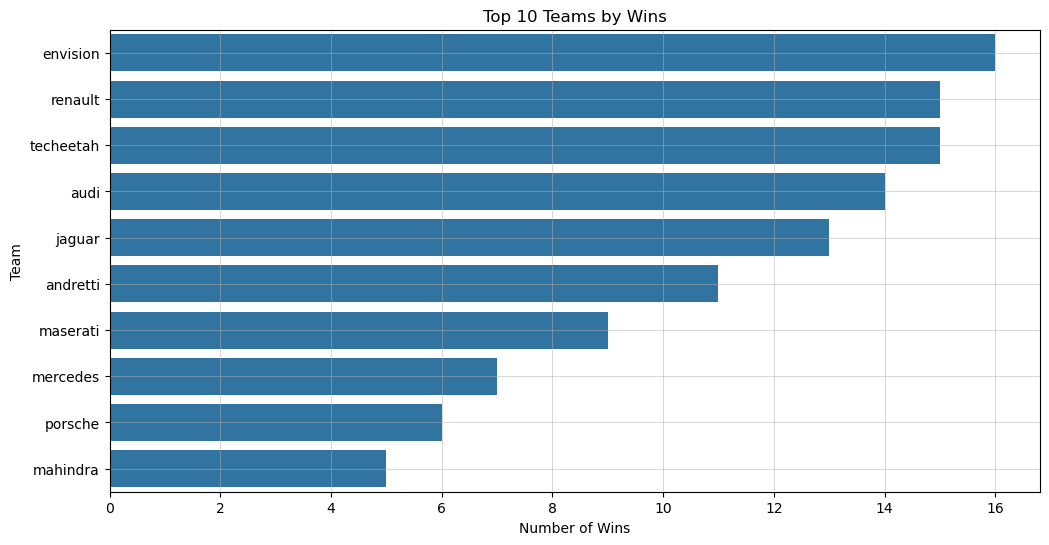

In [128]:
# visualizing the top 10 teams

plt.figure(figsize=(12,6))
ax = sns.barplot( data=top10_teams, x='wins', y='teamRef',)
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.title('Top 10 Teams by Wins')
plt.grid(linestyle='-', linewidth=0.5, alpha=0.7)
plt.show()


In [130]:
wins_df

,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,...,DRIVER_COUNTRY,DRIVER_SHORTNAME,DRIVER_ECM Driver Id,DRIVER_ECM Country Id,DRIVER_*Extra 3,DRIVER_*Extra 4,DRIVER_*Extra 5,Unnamed: 37,is_dnf,best_lap_seconds
4,5,1,1,1.0,11,6.0,33.0,25.0,52:23.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,106.7
20,21,1,2,1.0,2,48.0,7.0,31.0,51:12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,85.6
40,41,1,3,1.0,9,44.0,10.0,31.0,49:09.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,79.1
66,67,1,4,1.0,55,3.0,25.0,35.0,48:52.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,72.7
82,83,1,5,1.0,8,40.0,59.0,39.0,46:12.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,5289,10,128,1.0,13,NaN,NaN,NaN,NaN,NaN,...,PRT,DAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2754,5311,10,129,1.0,13,NaN,NaN,NaN,NaN,NaN,...,PRT,DAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2776,5333,10,130,1.0,13,NaN,NaN,NaN,NaN,NaN,...,PRT,DAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2798,5355,10,131,1.0,94,NaN,NaN,NaN,NaN,NaN,...,DEU,WEH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
#Merge with drivers to get driverRef or full name

podiums = combined[results['pos'].isin([1, 2, 3])]

# Count podiums per driver
driver_podiums = podiums['driverId'].value_counts().reset_index()
driver_podiums.columns = ['driverId', 'podium_count']

# Merge with driver names
driver_podiums = driver_podiums.merge(drivers, on='driverId', how='left')

# Sort and take top 10
top_10_podiums = driver_podiums.sort_values(by='podium_count', ascending=False).head(10)

NameError: name 'combined' is not defined

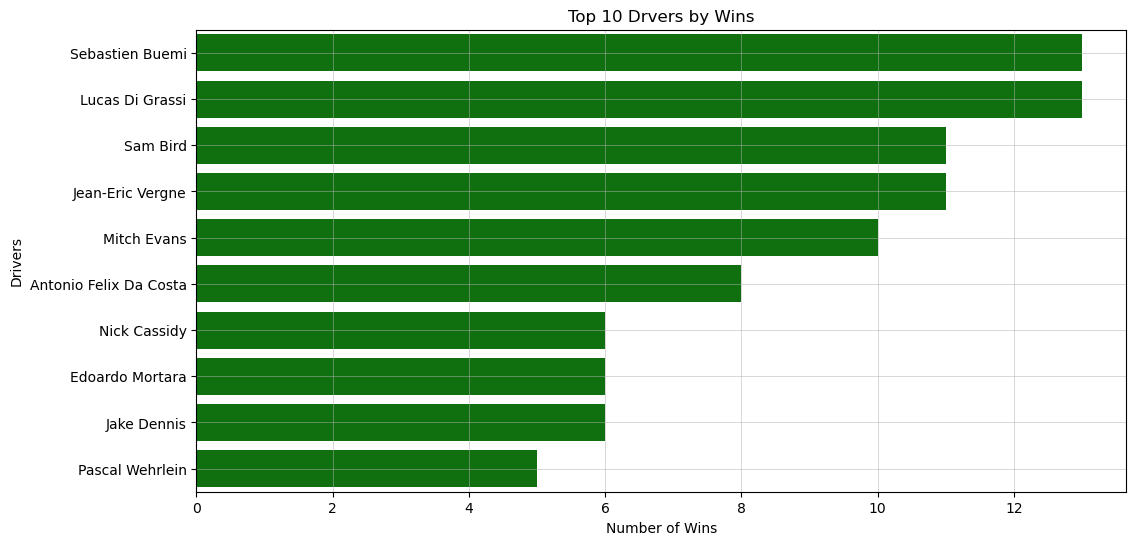

In [134]:
plt.figure(figsize=(12,6))
ax = sns.barplot( data=top10_drivers_by_wins, x='wins', y='driver_name', color="Green")
plt.xlabel('Number of Wins')
plt.ylabel('Drivers')
plt.title('Top 10 Drvers by Wins')
plt.grid(linestyle='-', linewidth=0.5, alpha=0.7)
plt.show()

## Investigation
Who has the most podiums?

In [137]:

podiums = combined_results[combined_results['pos'].isin([1, 2, 3])]

# Step 2: Count podiums per driver
driver_podiums = podiums['driverId'].value_counts().reset_index()
driver_podiums.columns = ['driverId', 'podium_count']

# Step 3: Merge with driver names
driver_podiums = driver_podiums.merge(drivers, on='driverId', how='left')

# Step 4: Sort by podium count
top_podium_drivers = driver_podiums.sort_values(by='podium_count', ascending=False)

# Display the top driver(s)
top_podium_drivers.head(10)


,driverId,podium_count,firstname,lastname,nationality
0,33.0,40,lucas,di grassi,brazil
1,76.0,34,jean-eric,vergne,france
2,10.0,31,sebastien,buemi,switzerland
3,7.0,26,sam,bird,united kingdom
4,24.0,25,mitch,evans,new zealand
5,25.0,19,antonio,felix da costa,portugal
6,18.0,18,jake,dennis,united kingdom
7,75.0,15,stoffel,vandoorne,belgium
8,13.0,15,nick,cassidy,new zealand
9,29.0,14,robin,frijns,netherlands


C:\Users\Jon\AppData\Local\Temp\ipykernel_30500\112019470.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_podiums, x='podium_count', y='driver_name', palette='viridis')


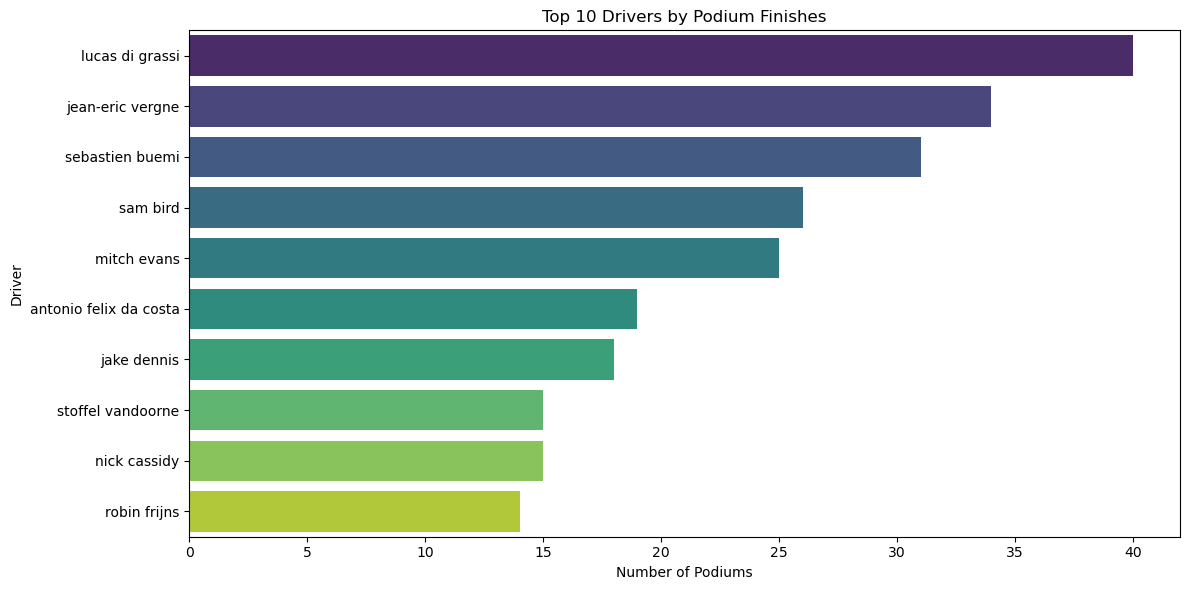

In [139]:
top_10_podiums['driver_name'] = top_10_podiums['firstname'] + ' ' + top_10_podiums['lastname']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_podiums, x='podium_count', y='driver_name', palette='viridis')

plt.title('Top 10 Drivers by Podium Finishes')
plt.xlabel('Number of Podiums')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

Seeing the rate of DNFs (did not finish) per race over the series

In [142]:
combined_results['is_dnf'] = combined_results['pos'].isna()

combined_results['is_dnf'].value_counts()

is_dnf
False    2333
True      509
Name: count, dtype: int64

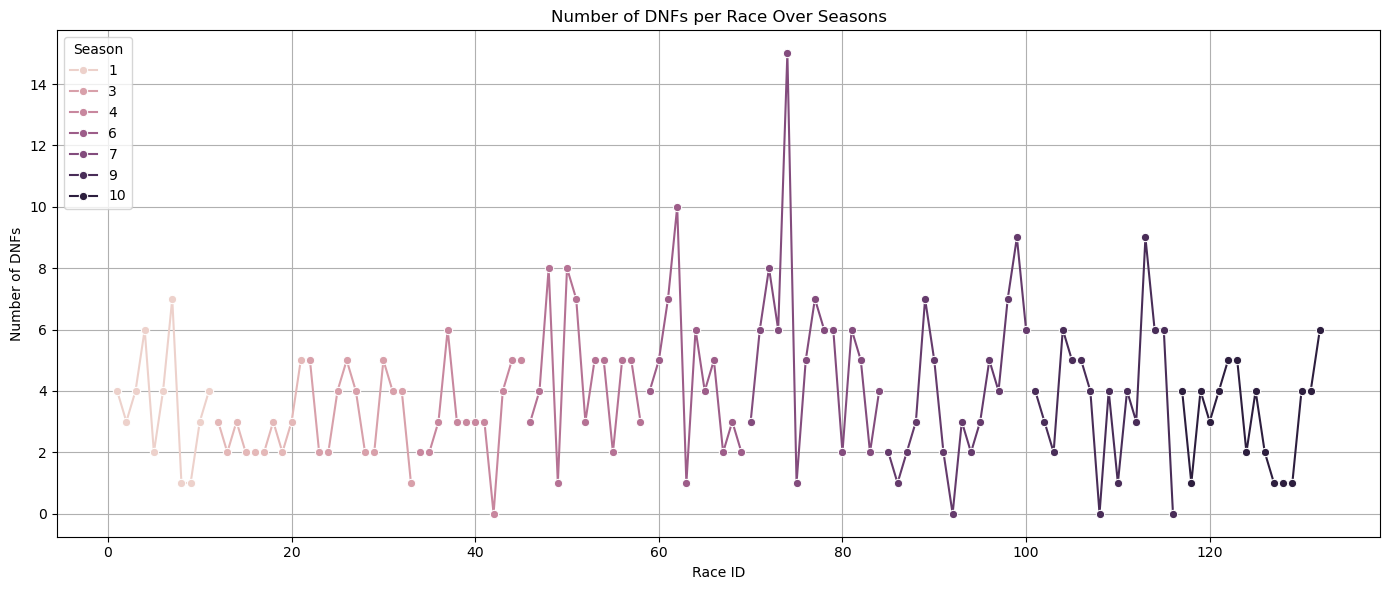

In [152]:
dnf_per_race = (
    combined_results.groupby(['seasonId', 'raceId'])['is_dnf']
    .sum()
    .reset_index()
    .rename(columns={'is_dnf': 'dnf_count'})
)

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=dnf_per_race, x='raceId', y='dnf_count', hue='seasonId', marker='o')

plt.title('Number of DNFs per Race Over Seasons')
plt.xlabel('Race ID')
plt.ylabel('Number of DNFs')
plt.legend(title='Season', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Points System Comparison
First, need to convert the fastest lap into seconds so it can be utilized for some of the systems

In [158]:
# Fastest lap finding: Need to convert the "best" laptime string to something usable for time. 

def time_str_to_seconds(time_str):
    try:
        if pd.isna(time_str):
            return None
        mins, secs = time_str.split(':')
        return int(mins) * 60 + float(secs)
    except:
        return None  # if there is no time (maybe a DNF or DNS)

# Apply the function
combined_results['best_lap_seconds'] = combined_results['best'].apply(time_str_to_seconds)
combined_results

,resultsId,seasonId,raceId,pos,number,teamId,driverId,laps,time,gap,...,DRIVER_COUNTRY,DRIVER_SHORTNAME,DRIVER_ECM Driver Id,DRIVER_ECM Country Id,DRIVER_*Extra 3,DRIVER_*Extra 4,DRIVER_*Extra 5,Unnamed: 37,is_dnf,best_lap_seconds
0,1,1,1,NaN,55,3.0,64.0,21.0,50:52.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,105.1
1,2,1,1,NaN,9,44.0,10.0,14.0,37:24.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,105.9
2,3,1,1,NaN,10,46.0,74.0,2.0,41:22.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,112.6
3,4,1,1,NaN,21,26.0,65.0,NaN,01:41.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,109.5
4,5,1,1,1.0,11,6.0,33.0,25.0,52:23.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,106.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,5394,10,132,NaN,7,NaN,NaN,NaN,NaN,NaN,...,DEU,GUE,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2838,5395,10,132,NaN,18,NaN,NaN,NaN,NaN,NaN,...,IND,DAR,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2839,5396,10,132,NaN,8,NaN,NaN,NaN,NaN,NaN,...,GBR,BIR,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2840,5397,10,132,NaN,48,NaN,NaN,NaN,NaN,NaN,...,CHE,MOR,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


Choose season 9 - We know the results already - 1.Jake Dennis, 2.Nick Cassidy, 3.Mitch Evans, ect.
Let's see how other systems may change those results starting with:
#### 1962 - 1990 F1 points system 8 6 4 3 2 1 FL

In [175]:
season9_results = combined_results[combined_results['seasonId'] == 9].copy()
season9_results['pos'] = pd.to_numeric(season9_results['pos'], errors='coerce')

In [ ]:
season9_results

In [181]:
custom_points = {1: 8, 2: 6, 3: 4, 4: 3, 5: 2, 6: 1}

# Map positions to points
season9_results['custom_points'] = season9_results['pos'].map(custom_points).fillna(0)

In [185]:
# Find fastest lap per race
fastest_laps = (
    season9_results[['raceId', 'driverId', 'best_lap_seconds', 'pos']]
    .dropna(subset=['best_lap_seconds'])
    .sort_values(by=['raceId', 'best_lap_seconds'])
    .groupby('raceId')
    .first()
    .reset_index()
)

# Only include if that driver finished in top 6
fastest_laps_bonus = fastest_laps[fastest_laps['pos'] <= 6][['raceId', 'driverId']]
fastest_laps_bonus['bonus_point'] = 1

# Merge bonus back into main results
season9_results = season9_results.merge(
    fastest_laps_bonus,
    on=['raceId', 'driverId'],
    how='left'
)

# Fill NaN bonus with 0 and add to custom_points
season9_results['bonus_point'] = season9_results['bonus_point'].fillna(0)
season9_results['total_points'] = season9_results['custom_points'] + season9_results['bonus_point']

In [187]:
final_standings = (
    season9_results.groupby('driverId')['total_points']
    .sum()
    .reset_index()
    .sort_values(by='total_points', ascending=False)
)

final_standings = final_standings.merge(drivers, on='driverId', how='left')

In [189]:
final_standings.head(10)

,driverId,total_points,firstname,lastname,nationality
0,18.0,74.0,jake,dennis,united kingdom
1,13.0,57.0,nick,cassidy,new zealand
2,24.0,56.0,mitch,evans,new zealand
3,79.0,36.0,pascal,wehrlein,germany
4,7.0,26.0,sam,bird,united kingdom
5,76.0,25.0,jean-eric,vergne,france
6,34.0,23.0,maximilian,gunther,germany
7,25.0,21.0,antonio,felix da costa,portugal
8,10.0,19.0,sebastien,buemi,switzerland
9,55.0,11.0,norman,nato,france


In [256]:
final_standings = final_standings.merge(drivers[['driverId', 'firstname', 'lastname']], on='driverId', how='left')

In [258]:
top10_custom = final_standings.sort_values(by='total_points', ascending=False).head(10)

# Create full driver name for labeling
top10_custom['driver_name'] = top10_custom['firstname'] + ' ' + top10_custom['lastname']

C:\Users\Jon\AppData\Local\Temp\ipykernel_30500\1886097310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_custom, x='total_points', y='driver_name', palette='viridis')


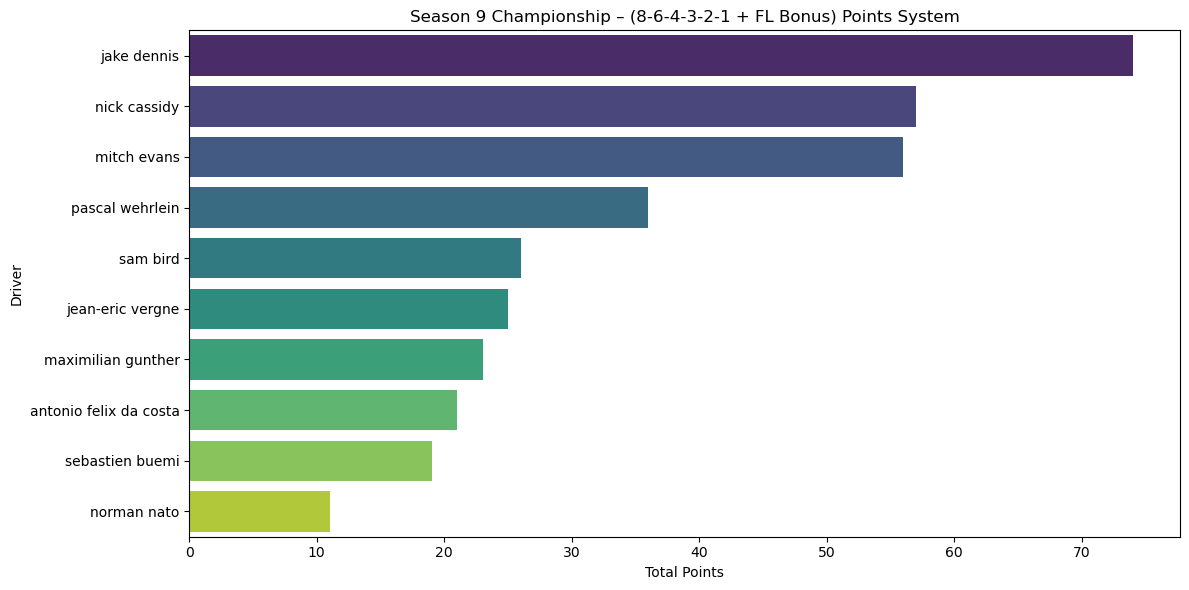

In [264]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_custom, x='total_points', y='driver_name', palette='viridis')
plt.title('Season 9 Championship – (8-6-4-3-2-1 + FL Bonus) Points System')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

#### 2003 - 2009 F1 points system 10 8 6 5 4 3 2 1 NOFL

In [192]:
custom_points = {    1: 10,
    2: 8,
    3: 6,
    4: 5,
    5: 4,
    6: 3,
    7: 2,
    8: 1
}
season9_results['custom_points'] = season9_results['pos'].map(custom_points).fillna(0)

In [196]:
alt_driver_points = season9_results.groupby('driverId')['custom_points'].sum().reset_index()
alt_driver_points = alt_driver_points.sort_values(by='custom_points', ascending=False)


In [198]:
alt_driver_points = alt_driver_points.merge(drivers[['driverId', 'firstname', 'lastname']], on='driverId', how='left')


In [277]:
final_standings2 = (
    season9_results.groupby('driverId')['total_points']
    .sum()
    .reset_index()
    .sort_values(by='total_points', ascending=False)
)

# Optionally merge with driver names
final_standings2 = final_standings2.merge(drivers, on='driverId', how='left')

In [279]:
final_standings2.head(10)


,driverId,total_points,firstname,lastname,nationality
0,18.0,74.0,jake,dennis,united kingdom
1,13.0,57.0,nick,cassidy,new zealand
2,24.0,56.0,mitch,evans,new zealand
3,79.0,36.0,pascal,wehrlein,germany
4,7.0,26.0,sam,bird,united kingdom
5,76.0,25.0,jean-eric,vergne,france
6,34.0,23.0,maximilian,gunther,germany
7,25.0,21.0,antonio,felix da costa,portugal
8,10.0,19.0,sebastien,buemi,switzerland
9,55.0,11.0,norman,nato,france


C:\Users\Jon\AppData\Local\Temp\ipykernel_30500\1446096764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='custom_points', y=top10['firstname'] + ' ' + top10['lastname'], palette='mako')


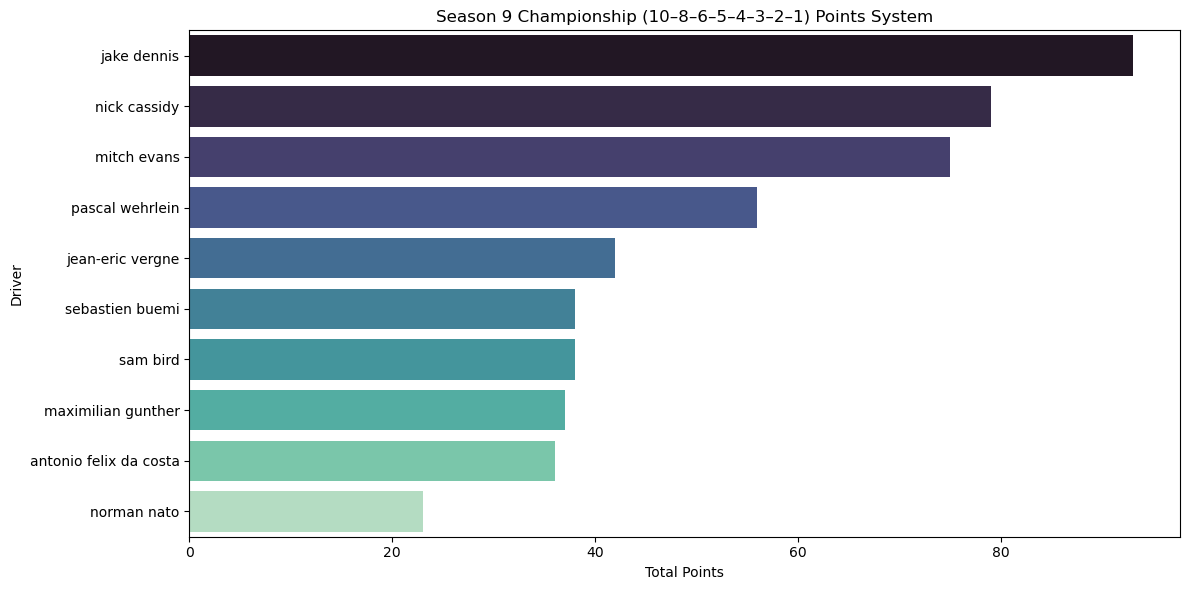

In [268]:
plt.figure(figsize=(12,6))
top10 = alt_driver_points.head(10)
sns.barplot(data=top10, x='custom_points', y=top10['firstname'] + ' ' + top10['lastname'], palette='mako')
plt.title('Season 9 Championship (10–8–6–5–4–3–2–1) Points System')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()
# this seems to have changed a bit.

#### 2019 - 2024 F1 points system 25 18 15 12 10 8 6 4 2 1 FL

In [222]:
season9_fe = combined_results[combined_results['seasonId'] == 9].copy()


In [224]:
season9_fe['pos'] = pd.to_numeric(season9_fe['pos'], errors='coerce')


In [226]:
fe_points_map = {
    1: 25,
    2: 18,
    3: 15,
    4: 12,
    5: 10,
    6: 8,
    7: 6,
    8: 4,
    9: 2,
    10: 1
}

In [228]:
season9_fe['fe_points'] = season9_fe['pos'].map(fe_points_map).fillna(0)


In [ ]:

season9_fe['best_seconds'] = pd.to_timedelta(season9_fe['best'], errors='coerce').dt.total_seconds()

# Find fastest lap per race
fastest_lap = season9_fe.groupby('raceId')['best_seconds'].idxmin()

# Initialize bonus column
season9_fe['fl_bonus'] = 0

# Award +1 bonus point if the driver with FL finished in top 10
for idx in fastest_lap:
    if season9_fe.loc[idx, 'pos'] <= 10:
        season9_fe.loc[idx, 'fl_bonus'] = 1

In [238]:
season9_fe['total_fe_points'] = season9_fe['fe_points'] + season9_fe['fl_bonus']


In [240]:
fe_driver_points = season9_fe.groupby('driverId')['total_fe_points'].sum().reset_index()
fe_driver_points = fe_driver_points.sort_values(by='total_fe_points', ascending=False)

In [242]:
fe_driver_points = fe_driver_points.merge(drivers[['driverId', 'firstname', 'lastname']], on='driverId', how='left')

C:\Users\Jon\AppData\Local\Temp\ipykernel_30500\3194648094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_fe, x='total_fe_points', y=top10_fe['firstname'] + ' ' + top10_fe['lastname'], palette='rocket')


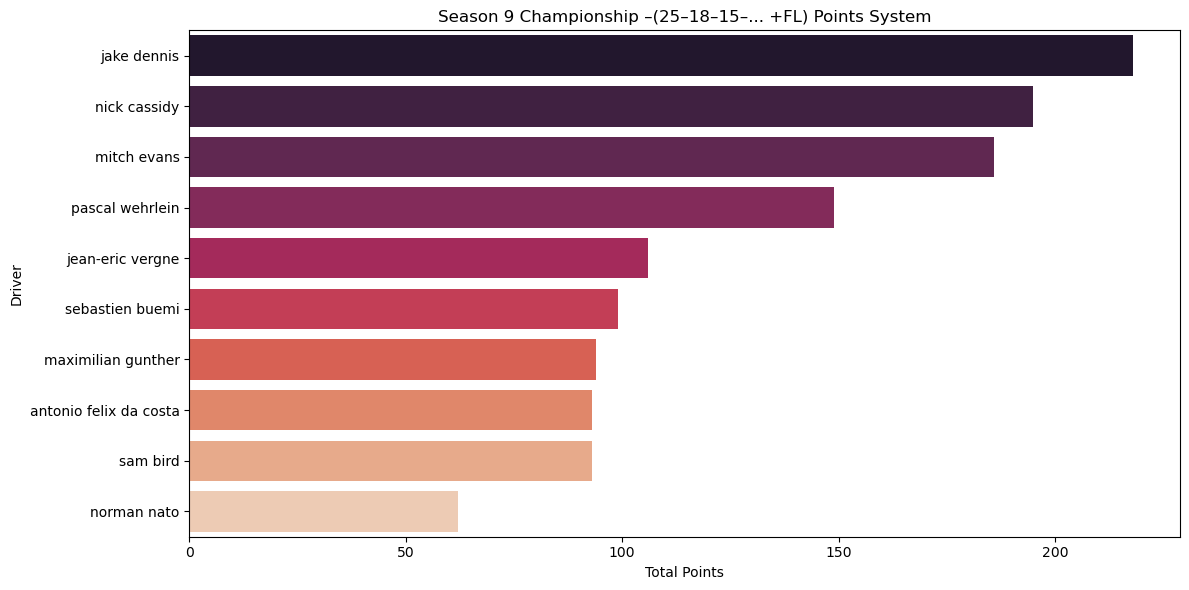

In [270]:
plt.figure(figsize=(12,6))
top10_fe = fe_driver_points.head(10)
sns.barplot(data=top10_fe, x='total_fe_points', y=top10_fe['firstname'] + ' ' + top10_fe['lastname'], palette='rocket')
plt.title('Season 9 Championship –(25–18–15–... +FL) Points System')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

In [ ]:
# Looks very similar to the original